In [2]:
import numpy as np
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt

In [3]:
df = pd.read_csv("train.csv")
df = df.sample(60000)
df.shape

(60000, 6)

In [4]:
df.sample(10)

,id,qid1,qid2,question1,question2,is_duplicate
24351,24351,45508,45509,When did you join Quora?,How did you join Quora?,0
322622,322622,448469,448470,Is Daniel Craig the best Bond after Sean Connery?,How would you rate Daniel Craig as James Bond?,0
163899,163899,20425,191009,Why can't I lose weight? Why is it so hard for...,Why does it take so much effort to lose weight?,1
9267,9267,18015,18016,"What is a Crush Card in ""Yu-Gi-Oh!""?",What is the Crush Card Virus card in Yu-Gi-Oh?,1
95638,95638,120674,27206,How does Donald Trump expect Mexico to pay for...,How is Trump planning to get Mexico to pay for...,1
382197,382197,180523,236646,What are the best disney movies (preferably an...,What is the best Disney movie?,1
162433,162433,69715,252864,Will the iPhone 6 be the most technologically ...,What is the most disappointing aspect or featu...,0
382887,382887,5715,72620,How can I lose weight slowly and naturally?,How do I lose my weight from 58 to 50 kgs?,1
37416,37416,68092,68093,What is malting?,What is malt?,0
142926,142926,226568,226569,"What is the difference between ""in"" and ""at""?",Difference between differentiation & different...,0


In [5]:
df.info()

<class 'pandas.core.frame.DataFrame'>
Index: 60000 entries, 30456 to 205977
Data columns (total 6 columns):
 #   Column        Non-Null Count  Dtype 
---  ------        --------------  ----- 
 0   id            60000 non-null  int64 
 1   qid1          60000 non-null  int64 
 2   qid2          60000 non-null  int64 
 3   question1     60000 non-null  object
 4   question2     60000 non-null  object
 5   is_duplicate  60000 non-null  int64 
dtypes: int64(4), object(2)
memory usage: 3.2+ MB


In [6]:
df.duplicated().sum()

0

In [7]:
df.isnull().sum()

id              0
qid1            0
qid2            0
question1       0
question2       0
is_duplicate    0
dtype: int64

is_duplicate
0    37730
1    22270
Name: count, dtype: int64
is_duplicate
0    62.883333
1    37.116667
Name: count, dtype: float64


<Axes: ylabel='count'>

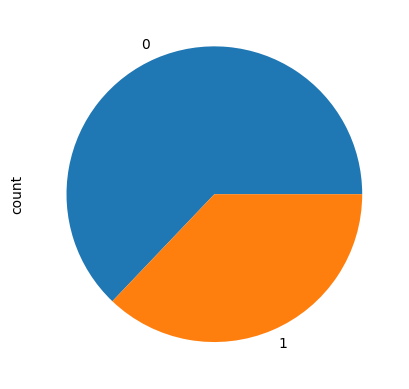

In [8]:
# distribution of duplicates to check is data unbalanced?

print(df['is_duplicate'].value_counts())
print(df['is_duplicate'].value_counts()/ df['is_duplicate'].count()*100)
df['is_duplicate'].value_counts().plot(kind="pie")

In [9]:
qid = pd.Series(df['qid1'].tolist() + df['qid2'].tolist())
print("Unique Questions : " ,np.unique(qid).shape[0])
x = qid.value_counts() > 1
print("Repeating Questions : " , x[x].shape[0])

Unique Questions :  104915
Repeating Questions :  9542


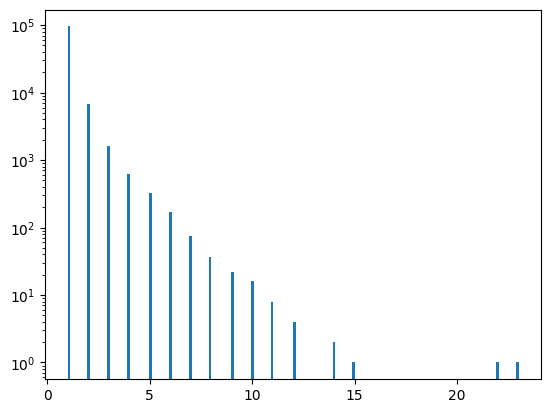

In [10]:
plt.hist(qid.value_counts().values , bins=160)
plt.yscale('log')
plt.show()

Feature Engineering


In [11]:
df['q1_len'] = df['question1'].str.len()
df['q2_len'] = df['question2'].str.len()
df

,id,qid1,qid2,question1,question2,is_duplicate,q1_len,q2_len
30456,30456,56246,56247,"What are steel grades T1, T2, T2.5 ,T3 ,T4 ,T5?",Does Katrina Kaif pray in the mosque?,0,47,37
382274,382274,514110,5997,What are the best ways to motivate myself to s...,"I wanna study hard but I can't, how can I moti...",1,120,67
329677,329677,3752,456343,Aren't genetic algorithms basically generating...,Do the miracles of Prophet Mikandiwa prove tha...,0,163,79
10195,10195,19784,19785,Who is Jon Snow?,Who are Jon Snow's real parents?,0,16,32
20024,20024,37811,37812,Do you think The Man Without Qualities is a cl...,I find most of the classic novels recondite. I...,0,58,96
...,...,...,...,...,...,...,...,...
48530,48530,86509,86510,Can you get money from dollarcell.com? And if ...,Can we really get money from YouTube?,0,54,37
308675,308675,432548,432549,"Which is better in terms of placements: KIIT, ...","Which is better: CSE in Manipal, KIIT, SRM or ...",0,58,68
245757,245757,149060,191821,How clean is prime minister Narendra Modi in t...,Why do some people think that Narendra Modi is...,1,65,55
237531,237531,348713,348714,Which is best English grammar book for competi...,Which is best book for English basic grammar f...,0,56,54


In [12]:
df['q1_words'] = df['question1'].apply(lambda x : len(x.split(" ")))
df['q2_words'] = df['question2'].apply(lambda x : len(x.split(" ")))
df.head()

,id,qid1,qid2,question1,question2,is_duplicate,q1_len,q2_len,q1_words,q2_words
30456,30456,56246,56247,"What are steel grades T1, T2, T2.5 ,T3 ,T4 ,T5?",Does Katrina Kaif pray in the mosque?,0,47,37,10,7
382274,382274,514110,5997,What are the best ways to motivate myself to s...,"I wanna study hard but I can't, how can I moti...",1,120,67,23,14
329677,329677,3752,456343,Aren't genetic algorithms basically generating...,Do the miracles of Prophet Mikandiwa prove tha...,0,163,79,25,15
10195,10195,19784,19785,Who is Jon Snow?,Who are Jon Snow's real parents?,0,16,32,4,6
20024,20024,37811,37812,Do you think The Man Without Qualities is a cl...,I find most of the classic novels recondite. I...,0,58,96,11,16


In [13]:
def common(x):
    s1 = set(map(lambda y : y.lower().strip(), x['question1'].split(" ")))
    s2 = set(map(lambda y : y.lower().strip(), x['question2'].split(" ")))
    return len(s1&s2)

In [14]:
df['common_words'] = df.apply(common, axis=1)
df.head()

,id,qid1,qid2,question1,question2,is_duplicate,q1_len,q2_len,q1_words,q2_words,common_words
30456,30456,56246,56247,"What are steel grades T1, T2, T2.5 ,T3 ,T4 ,T5?",Does Katrina Kaif pray in the mosque?,0,47,37,10,7,0
382274,382274,514110,5997,What are the best ways to motivate myself to s...,"I wanna study hard but I can't, how can I moti...",1,120,67,23,14,6
329677,329677,3752,456343,Aren't genetic algorithms basically generating...,Do the miracles of Prophet Mikandiwa prove tha...,0,163,79,25,15,6
10195,10195,19784,19785,Who is Jon Snow?,Who are Jon Snow's real parents?,0,16,32,4,6,2
20024,20024,37811,37812,Do you think The Man Without Qualities is a cl...,I find most of the classic novels recondite. I...,0,58,96,11,16,3


In [15]:
def tot(x):
    w1 = set(map(lambda x : x.lower().strip(), x['question1'].split(" ")))
    w2 = set(map(lambda x : x.lower().strip(), x['question2'].split(" ")))
    return (len(w1) + len(w2))

In [16]:
df['total_words'] = df.apply(tot, axis=1)
df.head()

,id,qid1,qid2,question1,question2,is_duplicate,q1_len,q2_len,q1_words,q2_words,common_words,total_words
30456,30456,56246,56247,"What are steel grades T1, T2, T2.5 ,T3 ,T4 ,T5?",Does Katrina Kaif pray in the mosque?,0,47,37,10,7,0,17
382274,382274,514110,5997,What are the best ways to motivate myself to s...,"I wanna study hard but I can't, how can I moti...",1,120,67,23,14,6,34
329677,329677,3752,456343,Aren't genetic algorithms basically generating...,Do the miracles of Prophet Mikandiwa prove tha...,0,163,79,25,15,6,39
10195,10195,19784,19785,Who is Jon Snow?,Who are Jon Snow's real parents?,0,16,32,4,6,2,10
20024,20024,37811,37812,Do you think The Man Without Qualities is a cl...,I find most of the classic novels recondite. I...,0,58,96,11,16,3,26


In [17]:
df['word_share'] = round(df['common_words'] / df['total_words'], 2)
df.head()

,id,qid1,qid2,question1,question2,is_duplicate,q1_len,q2_len,q1_words,q2_words,common_words,total_words,word_share
30456,30456,56246,56247,"What are steel grades T1, T2, T2.5 ,T3 ,T4 ,T5?",Does Katrina Kaif pray in the mosque?,0,47,37,10,7,0,17,0.00
382274,382274,514110,5997,What are the best ways to motivate myself to s...,"I wanna study hard but I can't, how can I moti...",1,120,67,23,14,6,34,0.18
329677,329677,3752,456343,Aren't genetic algorithms basically generating...,Do the miracles of Prophet Mikandiwa prove tha...,0,163,79,25,15,6,39,0.15
10195,10195,19784,19785,Who is Jon Snow?,Who are Jon Snow's real parents?,0,16,32,4,6,2,10,0.20
20024,20024,37811,37812,Do you think The Man Without Qualities is a cl...,I find most of the classic novels recondite. I...,0,58,96,11,16,3,26,0.12


In [18]:
ques_df = df[['question1', 'question2']]
ques_df.head()

,question1,question2
30456,"What are steel grades T1, T2, T2.5 ,T3 ,T4 ,T5?",Does Katrina Kaif pray in the mosque?
382274,What are the best ways to motivate myself to s...,"I wanna study hard but I can't, how can I moti..."
329677,Aren't genetic algorithms basically generating...,Do the miracles of Prophet Mikandiwa prove tha...
10195,Who is Jon Snow?,Who are Jon Snow's real parents?
20024,Do you think The Man Without Qualities is a cl...,I find most of the classic novels recondite. I...


In [19]:
final_df = df[['q1_len', 'q1_words','q2_len', 'q2_words', 'common_words', 'total_words', 'word_share', 'is_duplicate']]
final_df.head()

,q1_len,q1_words,q2_len,q2_words,common_words,total_words,word_share,is_duplicate
30456,47,10,37,7,0,17,0.00,0
382274,120,23,67,14,6,34,0.18,1
329677,163,25,79,15,6,39,0.15,0
10195,16,4,32,6,2,10,0.20,0
20024,58,11,96,16,3,26,0.12,0


In [20]:
from sklearn.feature_extraction.text import CountVectorizer
questions = list(ques_df['question1']) + list(ques_df['question2'])
cv = CountVectorizer(max_features=4000)
q1_arr, q2_arr = np.vsplit(cv.fit_transform(questions).toarray(),2)

In [21]:
temp_df1 = pd.DataFrame(q1_arr,index = ques_df.index)
temp_df2 = pd.DataFrame(q2_arr,index = ques_df.index)
final_df = pd.concat([temp_df1, temp_df2, final_df], axis=1)



In [22]:
final_df.shape

(60000, 8008)

In [23]:
final_df.head()

,0,1,2,3,4,5,6,7,8,9,...,3998,3999,q1_len,q1_words,q2_len,q2_words,common_words,total_words,word_share,is_duplicate
30456,0,0,0,0,0,0,0,0,0,0,...,0,0,47,10,37,7,0,17,0.00,0
382274,0,0,0,0,0,0,0,0,0,0,...,0,0,120,23,67,14,6,34,0.18,1
329677,0,0,0,0,0,0,0,0,0,0,...,0,0,163,25,79,15,6,39,0.15,0
10195,0,0,0,0,0,0,0,0,0,0,...,0,0,16,4,32,6,2,10,0.20,0
20024,0,0,0,0,0,0,0,0,0,0,...,0,0,58,11,96,16,3,26,0.12,0


In [24]:
from sklearn.model_selection import train_test_split
x_train, x_test, y_train, y_test = train_test_split(final_df.iloc[:,0:8007].values, final_df.iloc[:,8007].values, test_size = 0.2, random_state=2)

In [25]:
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import accuracy_score
rf = RandomForestClassifier()
rf.fit(x_train, y_train)
y_pred = rf.predict(x_test)
accuracy_score(y_test, y_pred)


0.7795833333333333

In [26]:
from xgboost import XGBClassifier
xgb = XGBClassifier()
xgb.fit(x_train, y_train)
y_pred = xgb.predict(x_test)
accuracy_score(y_test, y_pred)

0.7745